In [15]:
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mbti_data = pd.read_csv("mbti_1.csv")
mbti_data.head()
mbti_data.info()

print(mbti_data.type.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


Data Visualization

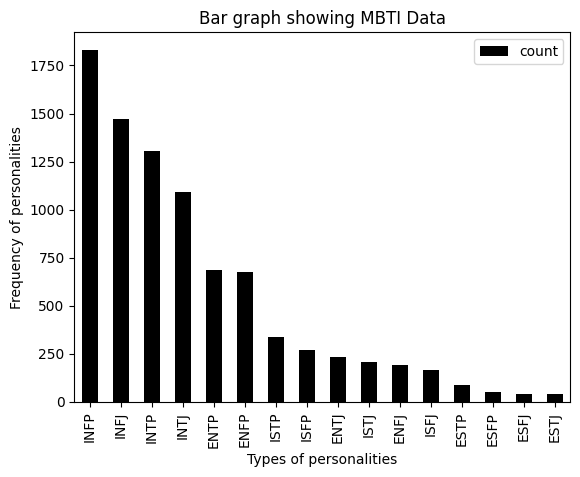

In [9]:
pd.DataFrame(mbti_data.type.value_counts()).plot.bar(color='black')
plt.ylabel('Frequency of personalities')
plt.xlabel('Types of personalities')
plt.title('Bar graph showing MBTI Data')
plt.show()

Next step: Write a function to clean the data and get rid of all the special characters in the posts column of the dataset

In [12]:
def clean_data(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

X = mbti_data["posts"].apply(clean_data)
print(X[:5])
y = mbti_data["type"]
print(y[:5])


0     and intj moments    sportscenter not top ten ...
1    im finding the lack of me in these posts very ...
2    good one      course to which i say i know tha...
3    dear intp   i enjoyed our conversation the oth...
4    youre firedthats another silly misconception t...
Name: posts, dtype: object
0    INFJ
1    ENTP
2    INTP
3    INTJ
4    ENTJ
Name: type, dtype: object


Next: Feature Extraction using TfidfVectorizer to convert text data to numerical features

Then, split data into training and test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [16]:
models = {
    'logreg': LogisticRegression(multi_class="multinomial", max_iter=1000, solver='lbfgs'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'svc': SVC(probability=True)
}

for name, model in models.items():
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

logreg Accuracy: 0.6035
Random Forest Accuracy: 0.5228
